# Прогнозирование перекрестных продаж медицинских страховок с помощью FEDOT и LLM

In [ ]:
import os
import sys

module_path = os.path.abspath(os.path.join(os.sep.join(['..', '..'])))
if module_path not in sys.path:
    sys.path.append(module_path)

from langchain.chat_models import init_chat_model
from fedot_llm.main import FedotAI

In [2]:
dataset_path = '../../datasets/Health_Insurance'

In [3]:
description="""Наш клиент - страховая компания, предоставляющая своим клиентам медицинское страхование. 
Теперь им нужна ваша помощь в построении модели для предсказания того, будут ли страхователи (клиенты) из прошлого года 
будут ли они также заинтересованы в страховании транспортных средств, предоставляемом компанией.\n
Построение модели, позволяющей предсказать, заинтересуется ли клиент автомобильным страхованием, чрезвычайно полезно для компании. 
потому что тогда она сможет соответствующим образом спланировать свою коммуникационную стратегию, чтобы привлечь этих клиентов и оптимизировать свою бизнес-модель и доходы.\n
Итак, для того чтобы предсказать, заинтересуется ли клиент страхованием транспортных средств, 
У вас есть информация о демографических характеристиках (пол, возраст, тип кода региона), транспортных средствах (возраст автомобиля, ущерб), полисе (премия, канал поставки) и т.д.
"""

# Progress:
- [x] Define Dataset Name
- [x] Define Dataset Description
- [x] Define Dataset Goal
- [x] Define Train Split
- [x] Define Test Split
- [x] Define Target Column
- [x] Define Task Type
- [x] Create Column Descriptions And Define Columns Category
- [x] Fedot makes predictions
- [x] Fedot Analyze Results

Here is the pipeline of the model I built:
# Model Pipeline
## The pipeline consists of:

### Stage 1: Random Forest (RF)
* A random forest model with `n_jobs` set to 12, indicating that it will utilize 12 CPU cores for parallel processing.

### Stage 2: Scaling
* An unknown scaling method is applied (likely Standardization or Min-Max Scaler) to the input data.

## Model Metrics:
| Metric | Value |
| --- | --- |
| roc_auc | 0.844 |
| accuracy | 0.871 |

These metrics indicate that:

* The Receiver Operating Characteristic-AUC (ROC-AUC) score is 0.844, which means that the model's ability to distinguish between positive and negative classes is good, but not perfect.
* The accuracy of the model is 0.871, indicating that it correctly predicts the class label for 87.1% of the samples in the dataset.

Note: ROC-AUC score measures the model's ability to rank instances based on their predicted probability of belonging to a positive class. An accuracy metric represents the proportion of correct predictions made by the model.

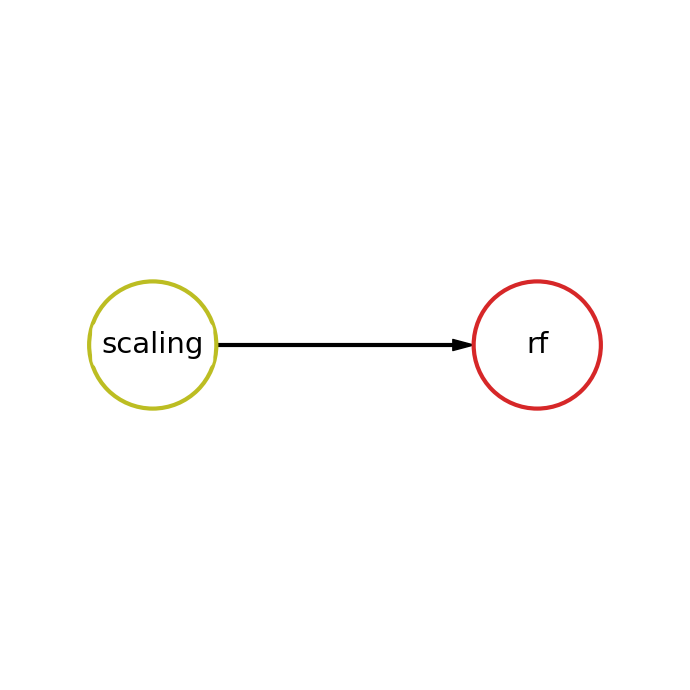

In [5]:
fedot_ai =  FedotAI(
        dataset=dataset_path,
        model=init_chat_model(
                        model="llama3.1",
                        model_provider='ollama'),
        output='jupyter')
predictions = await fedot_ai.predict(description)

In [6]:
predictions.predictions[-10:-30:-2]

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

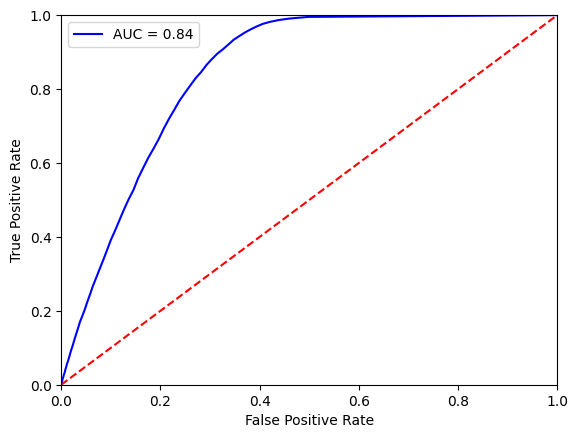

In [7]:
predictions.auto_model.plot_prediction()

In [8]:
path_to_save = f'{module_path}/saved_pipelines'
predictions.best_pipeline.save(path=path_to_save, create_subdir=True, is_datetime_in_path=True)

('{\n    "total_pipeline_operations": [\n        "scaling",\n        "rf"\n    ],\n    "depth": 2,\n    "nodes": [\n        {\n            "operation_id": 1,\n            "operation_type": "scaling",\n            "operation_name": "ScalingImplementation",\n            "custom_params": {},\n            "params": {},\n            "nodes_from": [],\n            "fitted_operation_path": [\n                "fitted_operations",\n                "operation_1.pkl"\n            ],\n            "rating": null\n        },\n        {\n            "operation_id": 0,\n            "operation_type": "rf",\n            "operation_name": "RandomForestClassifier",\n            "custom_params": {\n                "n_jobs": 12\n            },\n            "params": {\n                "n_jobs": 12\n            },\n            "nodes_from": [\n                1\n            ],\n            "fitted_operation_path": [\n                "fitted_operations",\n                "operation_0.pkl"\n            ],\n   